# Stack Club Course Session 6: Data Products To Science

<br>Owner(s): **Bryce Kalmbach** ([@jbkalmbach](https://github.com/LSSTScienceCollaborations/StackClubCourse/issues/new?body=@jbkalmbach))
<br>Last Verified to Run: **2020-05-01**
<br>Verified Stack Release: **w_2020_17**

This notebook shows 

### Learning Objectives:

After working through this lesson you should be able to: 
1.  

### Logistics
This notebook is intended to be runnable on `lsst-lsp-stable.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClubCourse.

This notebook uses methods from 

The data in this notebook is DECAM data from the HITS survey processed by Meredith Rawls ([@mrawls](https://github.com/mrawls)) (original dataset location: `/project/mrawls/hits2015/rerun/cw_2020_04`).

## Set-up

In [75]:
import lsst.daf.persistence as dafPersist

import numpy as np
import matplotlib.pyplot as plt

In [48]:
butler = dafPersist.Butler('/project/mrawls/hits2015/rerun/cw_2020_04')

In [64]:
calexp = butler.get('calexp', {'visit': 410915, 'ccdnum': 1, 'filter': 'g'})

In [72]:
im = calexp.getImage()

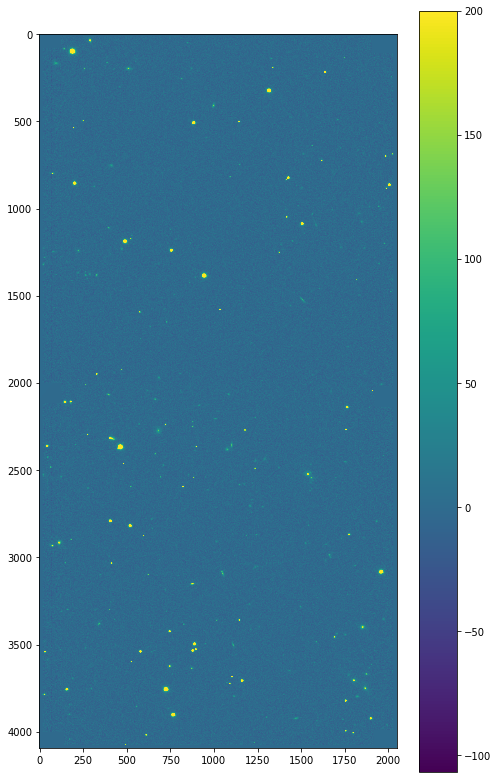

In [81]:
fig = plt.figure(figsize=(8, 14))
plt.imshow(im.array, vmax=200)
plt.colorbar()

In [91]:
src_cat = butler.get('src', {'visit': 410915, 'ccdnum': 1, 'filter': 'g'})

In [93]:
src_cat

<class 'lsst.afw.table.SourceCatalog'>
        id              coord_ra      ... calib_photometry_reserved
                          rad         ...                          
------------------ ------------------ ... -------------------------
176486652938551297 2.6120991203702717 ...                     False
176486652938551298 2.6120832008466057 ...                     False
176486652938551299  2.612082164342031 ...                     False
176486652938551300 2.6120870148656374 ...                     False
176486652938551301  2.612089952350183 ...                     False
176486652938551302 2.6120856369861025 ...                     False
176486652938551303 2.6121092658433485 ...                     False
176486652938551304 2.6121171217569708 ...                     False
176486652938551305  2.612114823680733 ...                     False
176486652938551306  2.612119282884259 ...                     False
               ...                ... ...                       ...
176486652

In [84]:
diffexp = butler.get('deepDiff_differenceExp', {'visit': 410915, 'ccdnum': 1, 'filter': 'g'})

In [85]:
diffim = diffexp.getImage()

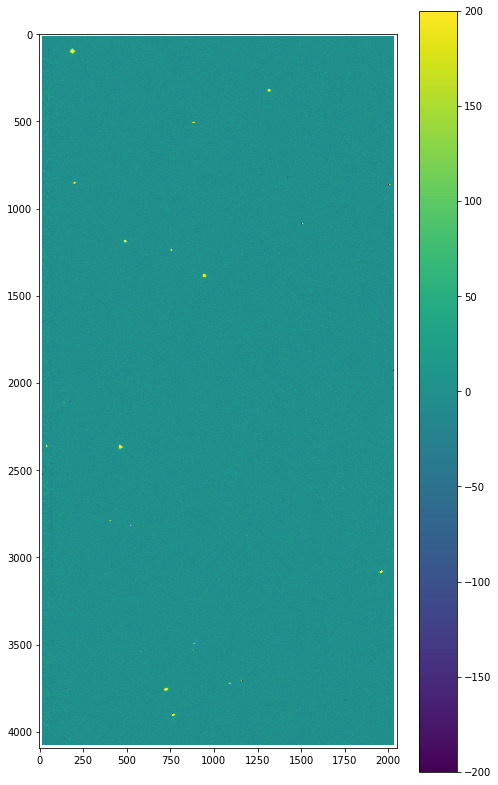

In [87]:
fig = plt.figure(figsize=(8, 14))
plt.imshow(diffim.array, vmax=200, vmin=-200)
plt.colorbar()

In [88]:
diffCat = butler.get('deepDiff_diaSrc', {'visit': 410915, 'ccdnum': 1, 'filter': 'g'})

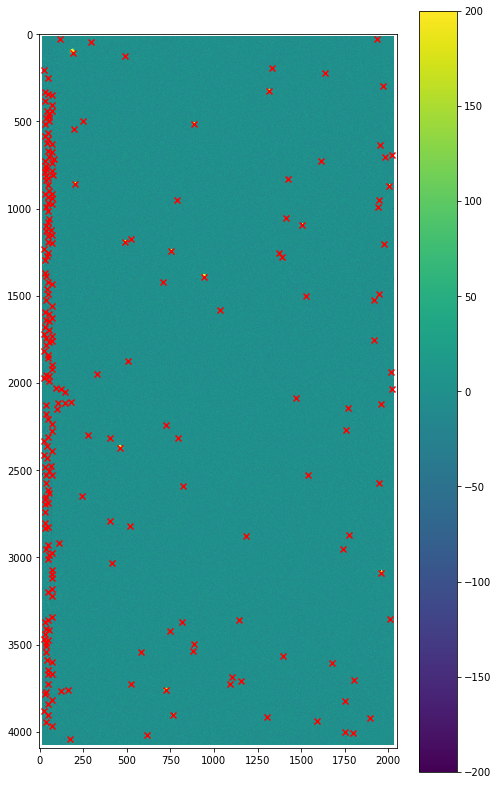

In [102]:
fig = plt.figure(figsize=(8, 14))
plt.imshow(diffim.array, vmax=200, vmin=-200)
plt.colorbar()
plt.scatter(diffCat['base_NaiveCentroid_x'], diffCat['base_NaiveCentroid_y'], marker='x', c='r')

In [23]:
data_types = butler.getDatasetTypes()

In [94]:
# list(np.sort(list(data_types)))